# Import the Necessary Libraries

In [1]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../input/weather-data/Weather Data.csv')

In [3]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [5]:
df.shape

(8784, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


# Data Cleansing

In [7]:
# We rename the columns to more meaningful headings and remove unneccasary characters
df.columns = ['Datetime', 'Temp [C]', 'Dew Point Temp [C]', 'Rel Hum [%]', 'Wind Speed [km/h]', 'Visibility [km]', 'Press [kPa]','Weather']

# Converting the timestamp column to time
df.index = pd.to_datetime(df['Datetime']).dt.floor('T')
df = df.iloc[:,1:]

# Remove the empty rows, from the dataset if there are any
df.drop(df[df.isnull().any(axis=1)].index, inplace=True)

# Remove the duplicates from the data if any
df.drop_duplicates(inplace=True)

# Seperating weather columns in categories, Feature engineering the column
weather_split = ['Weather - p. 1', 'Weather - p. 2', 'Weather - p. 3' ]
df[weather_split] = df['Weather'].str.split(',', expand=True)

# Now remove the weather column
df.drop(['Weather'], axis=1, inplace=True)


In [8]:
# Using zero one coding to store the data
weather_category_list = np.array([])

for column in df[weather_split]:
    weather_category_list = np.append(weather_category_list, df[weather_split][column].unique())
    
weather_category_list = weather_category_list[weather_category_list != None]
weather_category_list = np.unique(weather_category_list)

df[weather_category_list] = 0


for column in df[weather_split]:
    for index in df[weather_split].index:
        if df.loc[index,column] != None:
            df.at[index, df.loc[index, column]] = df.loc[index, df.loc[index, column]]+1
            
# Deleting the weather columns now as we have seperated all the different weathers
df.drop(weather_split, axis=1, inplace=True)

# Create an auxiliary set of column names in measured values
weather_measurement_data = ['Temp [C]', 'Dew Point Temp [C]', 'Rel Hum [%]', 'Wind Speed [km/h]', 'Visibility [km]', 'Press [kPa]']

In [9]:
df.head()

,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa],Blowing Snow,Clear,Cloudy,Drizzle,...,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Pellets,Snow Showers,Thunderstorms
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temp [C]               8784 non-null   float64
 1   Dew Point Temp [C]     8784 non-null   float64
 2   Rel Hum [%]            8784 non-null   int64  
 3   Wind Speed [km/h]      8784 non-null   int64  
 4   Visibility [km]        8784 non-null   float64
 5   Press [kPa]            8784 non-null   float64
 6   Blowing Snow           8784 non-null   int64  
 7   Clear                  8784 non-null   int64  
 8   Cloudy                 8784 non-null   int64  
 9   Drizzle                8784 non-null   int64  
 10  Fog                    8784 non-null   int64  
 11  Freezing Drizzle       8784 non-null   int64  
 12  Freezing Fog           8784 non-null   int64  
 13  Freezing Rain          8784 non-null   int64  
 14  Haze                

In [11]:
df.shape

(8784, 29)

In [12]:
df[weather_measurement_data].describe()

,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa]
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


# Basic Data Visualisation

In [13]:
# Set color scheme
color_1 = '#BFAF9D'
color_2 = '#C1C1D5'
color_3 = '#A16F86'
color_4 = sns.diverging_palette(h_neg = 32, h_pos = 32, s = 21, l = 68, as_cmap = True)

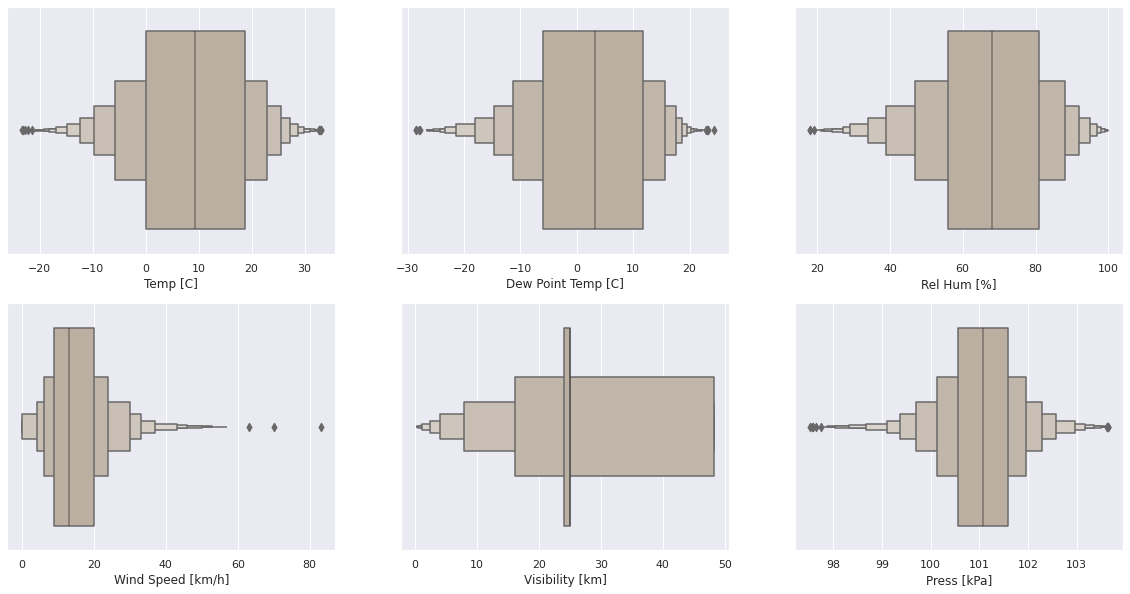

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(231)
sns.boxenplot(data=df, x='Temp [C]', color=color_1)

plt.subplot(232)
sns.boxenplot(data=df, x='Dew Point Temp [C]', color=color_1)

plt.subplot(233)
sns.boxenplot(data=df, x='Rel Hum [%]', color=color_1)

plt.subplot(234)
sns.boxenplot(data=df, x='Wind Speed [km/h]', color=color_1)

plt.subplot(235)
sns.boxenplot(data=df, x='Visibility [km]', color=color_1)

plt.subplot(236)
sns.boxenplot(data=df, x='Press [kPa]', color=color_1)

plt.show()

In [15]:
df

,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa],Blowing Snow,Clear,Cloudy,Drizzle,...,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Pellets,Snow Showers,Thunderstorms
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
# Calculation of moving averages of individual measurement parameters
for column in df[weather_measurement_data]:
    df['SMA168 ' + column] = df[column].rolling('168h', center = True).mean()

In [17]:
df

,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa],Blowing Snow,Clear,Cloudy,Drizzle,...,Snow Grains,Snow Pellets,Snow Showers,Thunderstorms,SMA168 Temp [C],SMA168 Dew Point Temp [C],SMA168 Rel Hum [%],SMA168 Wind Speed [km/h],SMA168 Visibility [km],SMA168 Press [kPa]
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,0,0,0,0,...,0,0,0,0,-6.510588,-11.812941,66.588235,20.470588,20.262353,100.614000
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,0,0,0,0,...,0,0,0,0,-6.579070,-11.909302,66.430233,20.360465,20.306977,100.619302
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,0,0,0,0,...,0,0,0,0,-6.633333,-11.990805,66.275862,20.206897,20.295402,100.623333
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,0,0,0,0,...,0,0,0,0,-6.673864,-12.039773,66.215909,20.102273,20.175000,100.626364
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,0,0,0,0,...,0,0,0,0,-6.704494,-12.078652,66.157303,20.022472,20.165169,100.628202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,0,0,0,0,...,0,0,0,0,-9.148864,-11.426136,83.625000,17.306818,18.929545,100.904318
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,0,0,0,0,...,0,0,0,0,-9.194253,-11.477011,83.586207,17.310345,18.870115,100.901494
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,0,0,0,0,...,0,0,0,0,-9.237209,-11.517442,83.593023,17.313953,18.809302,100.897674


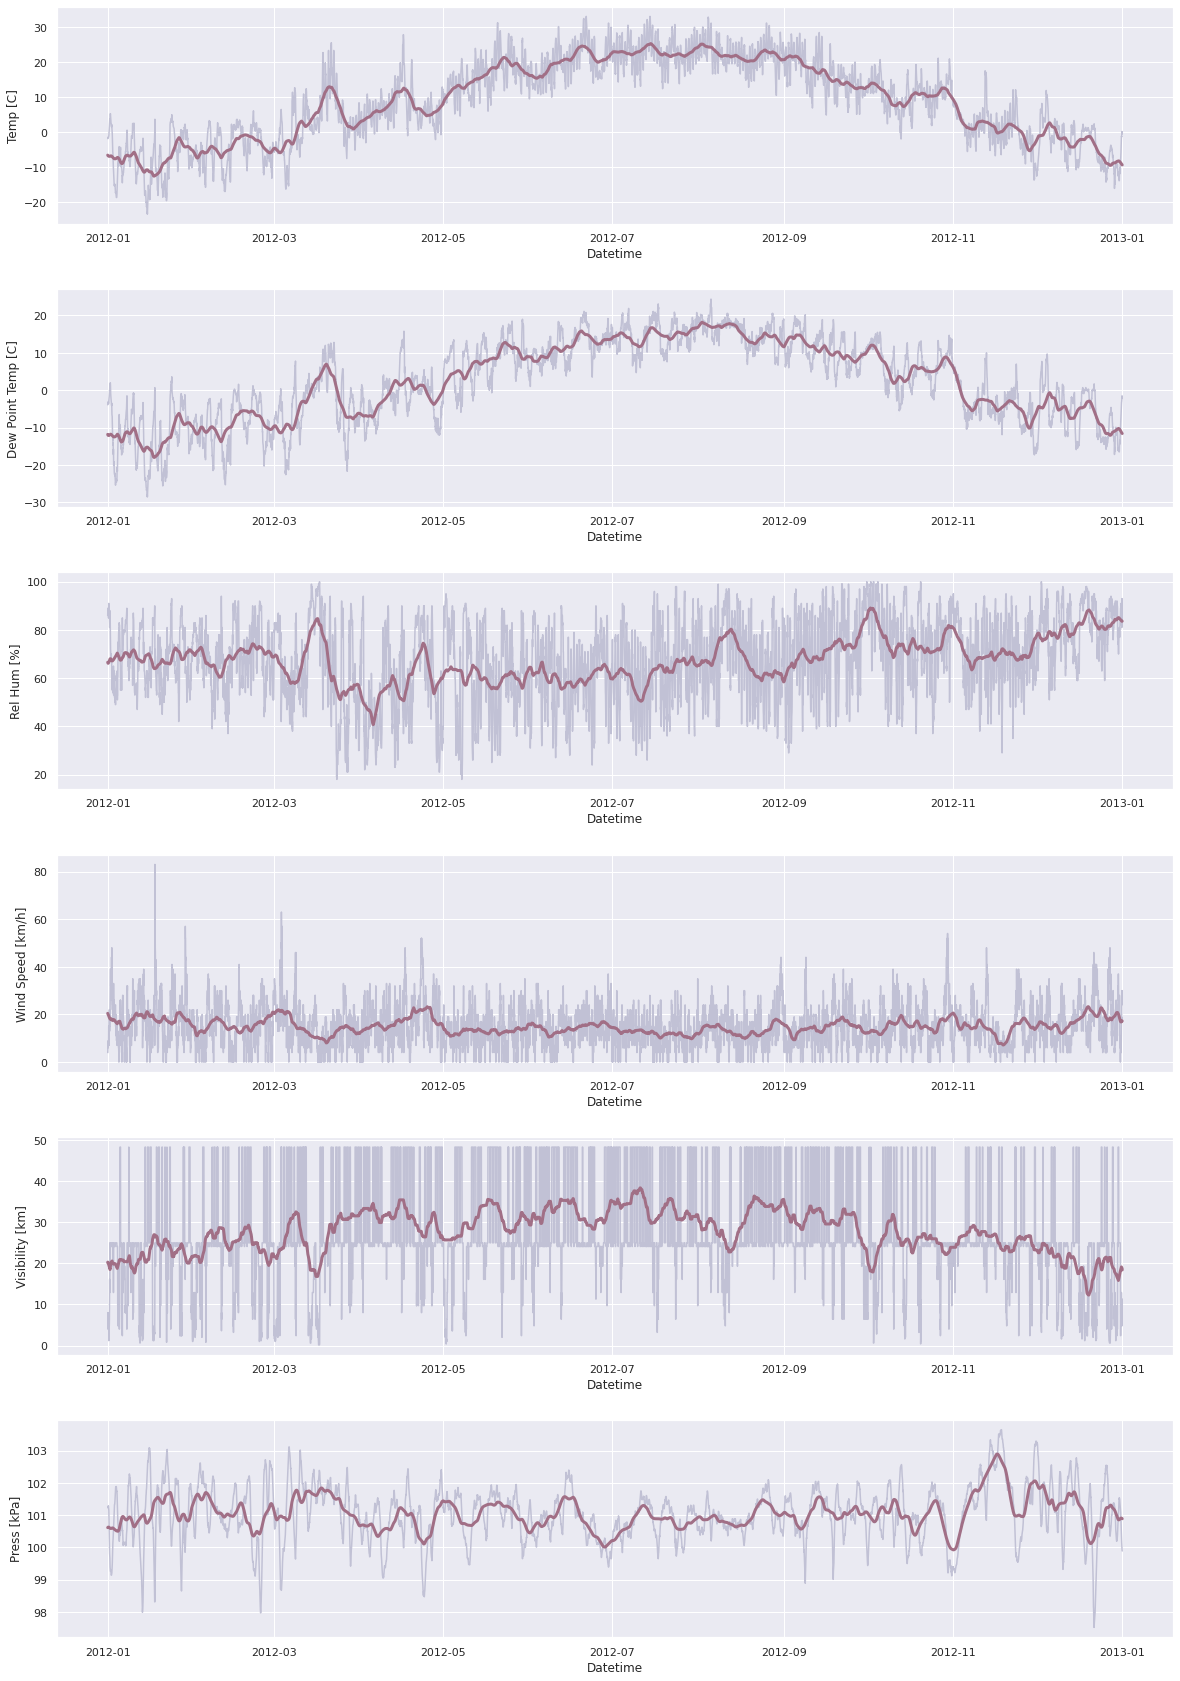

In [18]:
# Display Line Graphs

plt.figure(figsize=(20,30))

plt.subplot(611)
sns.lineplot(data=df, x='Datetime', y='Temp [C]', color=color_2)
sns.lineplot(data=df, x='Datetime', y='SMA168 Temp [C]', color=color_3, lw=3)

plt.subplot(612)
sns.lineplot(data=df, x='Datetime', y='Dew Point Temp [C]', color=color_2)
sns.lineplot(data=df, x='Datetime', y='SMA168 Dew Point Temp [C]', color=color_3, lw=3)

plt.subplot(613)
sns.lineplot(data=df, x='Datetime', y='Rel Hum [%]', color=color_2)
sns.lineplot(data=df, x='Datetime', y='SMA168 Rel Hum [%]', color=color_3, lw=3)

plt.subplot(614)
sns.lineplot(data=df, x='Datetime', y='Wind Speed [km/h]', color=color_2)
sns.lineplot(data=df, x='Datetime', y='SMA168 Wind Speed [km/h]', color=color_3, lw=3)

plt.subplot(615)
sns.lineplot(data=df, x='Datetime', y='Visibility [km]', color=color_2)
sns.lineplot(data=df, x='Datetime', y='SMA168 Visibility [km]', color=color_3, lw=3)

plt.subplot(616)
sns.lineplot(data=df, x='Datetime', y='Press [kPa]', color=color_2)
sns.lineplot(data=df, x='Datetime', y='SMA168 Press [kPa]', color=color_3, lw=3)

plt.subplots_adjust(hspace=0.3)
plt.show()


# Regression Algorithm

We solve this using regression,  where we can predict the visibility based on the other independent factors like temperature, humidity, and pressure.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
df['Datetime (month)'] = pd.to_datetime(df.index).month
df['Datetime (day)'] = pd.to_datetime(df.index).day
df['Datetime (hour)'] = pd.to_datetime(df.index).hour

inputs = ['Datetime (month)','Datetime (day)','Datetime (hour)','Temp [C]', 'Rel Hum [%]', 'Press [kPa]', 'Fog' ,'Rain', 'Snow']
outputs =  'Visibility [km]'

In [21]:
X = df[inputs]
y = df[outputs]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3)

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.neural_network import MLPRegressor

In [24]:
mlp = MLPRegressor(max_iter=5000).fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

In [25]:
result = pd.DataFrame({'Actual value (y_test)': y_test,
                      'Model Prediction (y_pred)': y_pred,
                      'Difference': abs(y_pred-y_test)})
result

,Actual value (y_test),Model Prediction (y_pred),Difference
Datetime,,,
2012-08-16 00:00:00,25.0,22.603483,2.396517
2012-12-12 23:00:00,16.1,19.979058,3.879058
2012-02-14 15:00:00,24.1,31.197863,7.097863
2012-11-05 15:00:00,24.1,36.079488,11.979488
2012-07-23 04:00:00,24.1,29.234410,5.134410
...,...,...,...
2012-05-16 18:00:00,24.1,25.854612,1.754612
2012-08-25 15:00:00,48.3,43.813071,4.486929
2012-12-17 23:00:00,16.1,19.327521,3.227521


In [26]:
result.describe()[result.describe().index != 'count']

,Actual value (y_test),Model Prediction (y_pred),Difference
mean,27.277322,27.380708,5.206149
std,12.615282,10.489172,4.798348
min,0.200000,-1.007722,0.000878
25%,24.100000,22.312907,1.657797
50%,25.000000,26.510721,3.635855
75%,25.000000,33.167846,7.195523
max,48.300000,53.320992,31.820722


In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rfr = RandomForestRegressor().fit(X_train_scaled, y_train)
y_pred = rfr.predict(X_test_scaled)

In [29]:
result = pd.DataFrame({'Actual Value': y_test,
                      'Predicted Value': y_pred,
                      'Difference': abs(y_pred - y_test)})

result.head()

,Actual Value,Predicted Value,Difference
Datetime,,,
2012-08-16 00:00:00,25.0,25.000,0.000
2012-12-12 23:00:00,16.1,17.208,1.108
2012-02-14 15:00:00,24.1,28.492,4.392
2012-11-05 15:00:00,24.1,36.188,12.088
2012-07-23 04:00:00,24.1,24.559,0.459


In [30]:
result.describe()[1:]

,Actual Value,Predicted Value,Difference
mean,27.277322,27.293639,3.809168
std,12.615282,10.567933,4.946062
min,0.200000,0.887000,0.000000
25%,24.100000,23.872000,0.276000
50%,25.000000,25.137000,1.665500
75%,25.000000,32.445750,5.534500
max,48.300000,48.300000,28.126000


# Summary

In [31]:
date_set = '2012-05-10 06:00:00'

X_data_summary = df[inputs][df.index == date_set]
y_data_summary = df[outputs][df.index == date_set]

In [32]:
print('For the selected date -', date_set, '- the actual visibility measurement was', y_data_summary[0])
print('The predicted value according to the model #1 (neural network) is', mlp.predict(scaler.transform(X_data_summary))[0])
print('The predicted value according to the model #2 (random forest) is', rfr.predict(scaler.transform(X_data_summary))[0])
print()
print('The machine learning models were based on data: Datetime, Temp [C], Rel Hum [%], Press [kPa], Fog, Rain, Snow.')

For the selected date - 2012-05-10 06:00:00 - the actual visibility measurement was 24.1
The predicted value according to the model #1 (neural network) is 22.909418741642867
The predicted value according to the model #2 (random forest) is 23.057999999999964

The machine learning models were based on data: Datetime, Temp [C], Rel Hum [%], Press [kPa], Fog, Rain, Snow.
